# Tutorial: Pronosticos en series de tiempo con Prophet

Este trabajo esta basado en el tutorial de PRASHANT BANERJEE escrito en Kaggle implementando diferentes datos. 
URL: https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet/notebook






## 1. Introduccion a Prophet

Prophet es una libreria de código abierto lanzado por el equipo Core Data Science de Facebook. Esta disponible para descargar en CRAN y PyPI

Esta herramienta es utilizada para hacer predicciones en series de tiempo. 

Prophet descompone los datos de series de tiempo en tendencia, estacionalidad y el efecto hollydays

## 2. Instalacion de Prophet

Esta libreta fue ejecutada en Google Colaboratory por lo que fue necesario primero degradar el package de PyStan a la versión 2.14

In [1]:
!pip install pystan~=2.14

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 74 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


In [2]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.6 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638201 sha256=c016cb3f1dff3345abe97481b42fe81a74626f3a3783cb1d83d292e7ec58cbdd
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.4
    Uninstalling cmdstanpy-1.0.4:
      Successfully uninstalled cmdstanpy-1.0.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1 requires cmdstanpy>=1.0.1, but you have cmdstanpy 0.9.5 which is incompatible.


## 3. Configuraciones básicas

Primero, importaremos las librerias requeridas y los datos.

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# sharper plots
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Conexion al drive para obtener los datos (solo necesario en Colab).

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Leemos los datos de un CSV y los guardamos en un DataFrame de pandas.

In [26]:
df_ingresos = pd.read_csv('/content/drive/MyDrive/GBO120213AY1 xml/ingresos.csv', sep='|')
df_ingresos.head(5)

,Fecha,Total
0,2017-12-04,1045.16
1,2017-12-05,7027.10
2,2017-12-06,12001.01
3,2017-12-07,7732.52
4,2017-12-08,8096.91


Resumen de los datos.

In [27]:
df_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fecha   1654 non-null   object 
 1   Total   1654 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.0+ KB


In [28]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go

# Initialize plotly
init_notebook_mode(connected=True)

* Prophet impone la condición de que las columnas de entrada deben nombrarse como ds (la columna del tiempo) e y (la columna métrica).

In [41]:
df_ingresos = df_ingresos.rename(columns={'Fecha': 'ds',
                        'Total': 'y'})

df_ingresos.tail()

,ds,y
1649,2022-06-10,3208.33
1650,2022-06-11,0.00
1651,2022-06-12,0.00
1652,2022-06-13,7080.63
1653,2022-06-14,21238.90


**visualización de los datos**

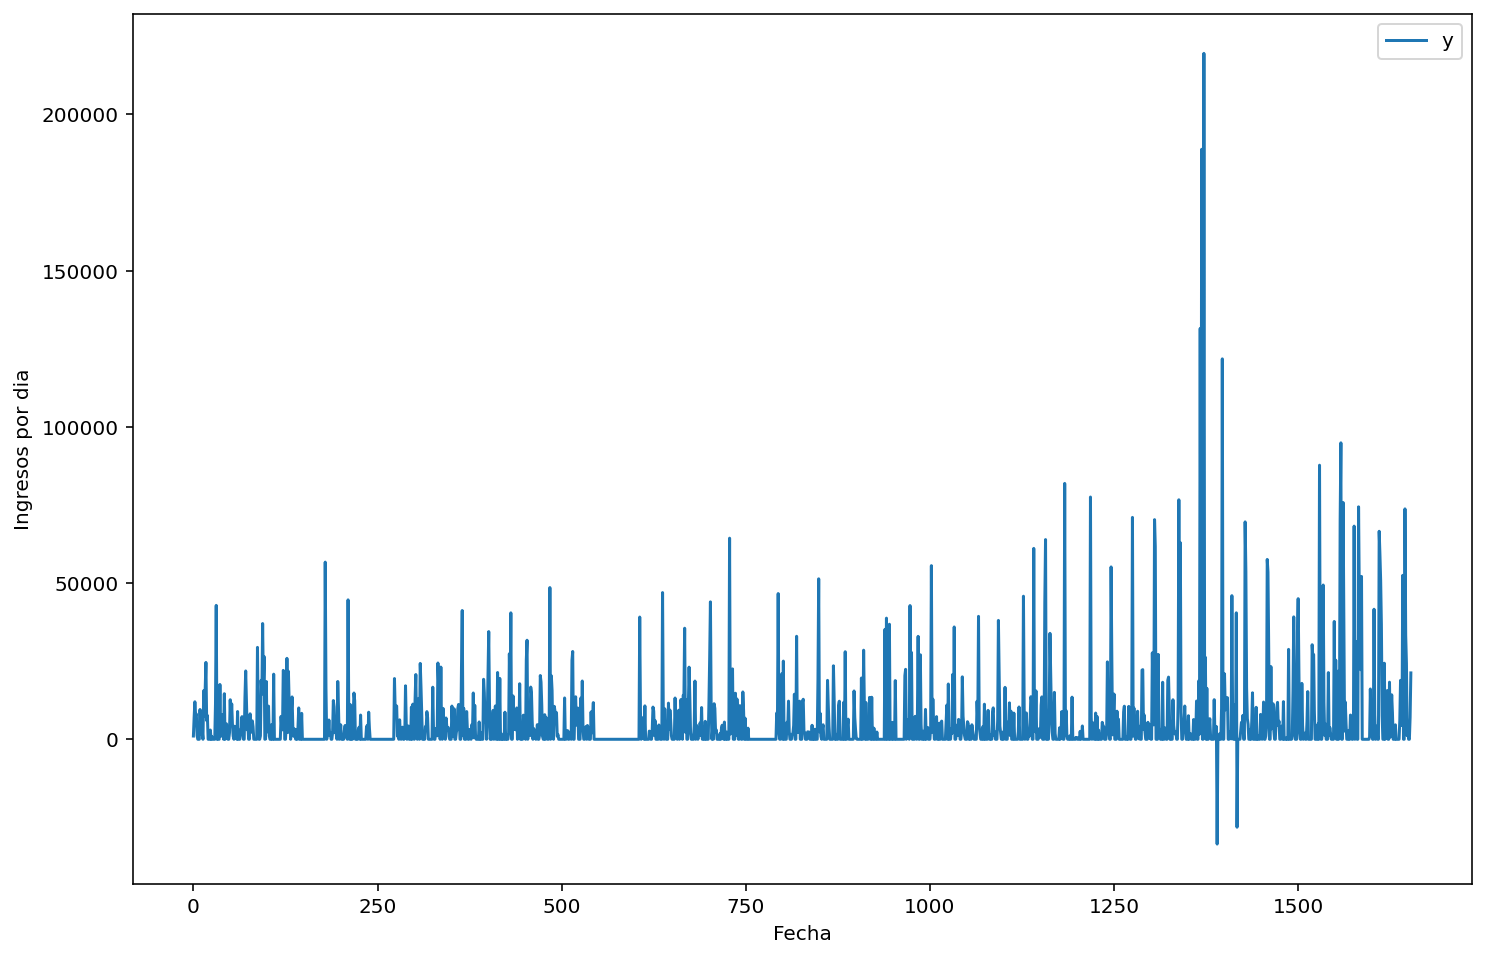

In [32]:
ax = df_ingresos.plot(figsize=(12, 8))
ax.set_ylabel('Ingresos por dia')
ax.set_xlabel('Fecha')

plt.show()

# 4. Prediccion en series de tiempo con Prophet


In [16]:
from fbprophet import Prophet

import logging
logging.getLogger().setLevel(logging.ERROR)

* Se describira como utilizar la libreria de Prophet para predecir valores a futuro.

* Los desarrolladores de Prophet lo han echo mas intuitivo para los demas desarrolladores que trabajan con series de tiempo

* Primero, necesitamos instanciar un objeto Prophet. Prophet nos permite espesificar el numero de argumetos. Por ejemplo, podemos espesificar el rango deseado para un cierto intervalo pasandole al valor al parametro *interval_width*




In [17]:
my_model = Prophet(interval_width=0.95)

* Ahora que el modelo Prophet ah sido inicializado, podemos llamar el metodo * fit * con nuestro DataFrame como parametro. 

In [33]:
my_model.fit(df_ingresos)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



* Para obtener la prediccion de nuestra serie de tiempo, necesitamos un nuevo DataFrame que contenga una columna *ds* que tenga las fechas de las cuales necesitamos la predicción.

* Convenientemente no necesitamos crear manualmente este DataFrame, ya que Prophet lo hace con la funcion de *make_future_dataframe* 



In [42]:
future_dates = my_model.make_future_dataframe(periods=365)
future_dates.tail()

,ds
2014,2023-06-10
2015,2023-06-11
2016,2023-06-12
2017,2023-06-13
2018,2023-06-14


* Con Prophet es importante considerar la frecuencia de nuestra serie de tiempo. 

* Como esta serie de tiempo esta por dia, se puso un tiempo de 365 dias o sea un año. 

* Ahora usamos el DataFrame de fechas futuras para asignarle la prediccion realizada por el modelo entrenado. 
  

In [44]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2014,2023-06-10,11427.190000,-15243.008089,37975.931657
2015,2023-06-11,10638.842687,-16232.247444,37420.529096
2016,2023-06-12,20619.075036,-5337.683078,46413.044072
2017,2023-06-13,19811.475571,-6991.409856,45297.258320
2018,2023-06-14,17810.913495,-7752.407454,44330.697104


Prophet regresa un gran DataFrame con muchas columnas interesantes, pero nos enfocamos en las columnas mas relevantes para la prediccion. 

* **ds**: fecha de la prediccion
* **yhat**: el valor de la prediccion
* **yhat_lower**: el limite inferior de la prediccion
* **yhat_upper**: the upper bound of our forecast

* Prophet tambien proporciona una funcion para graficar los resultados.

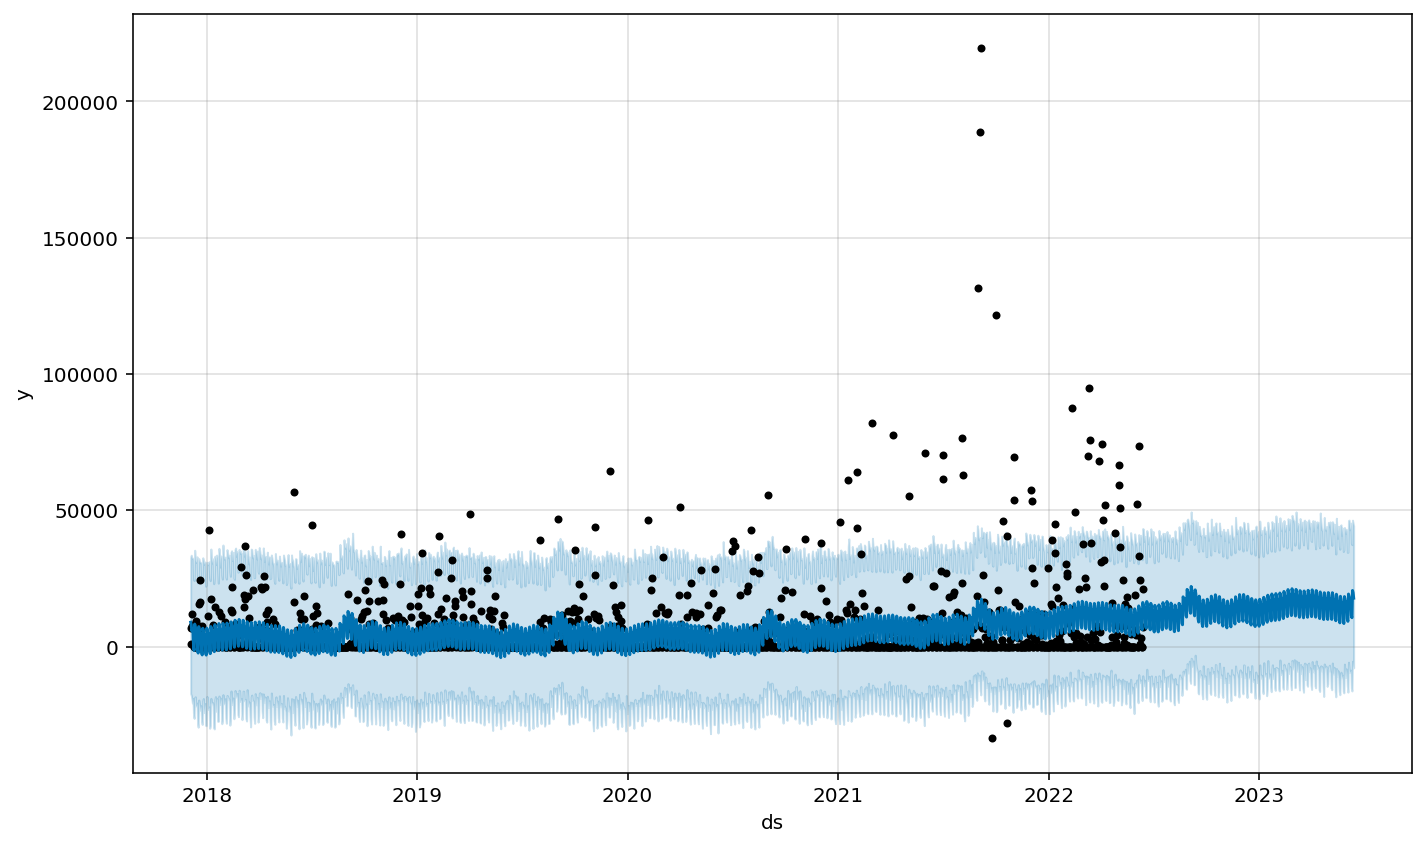

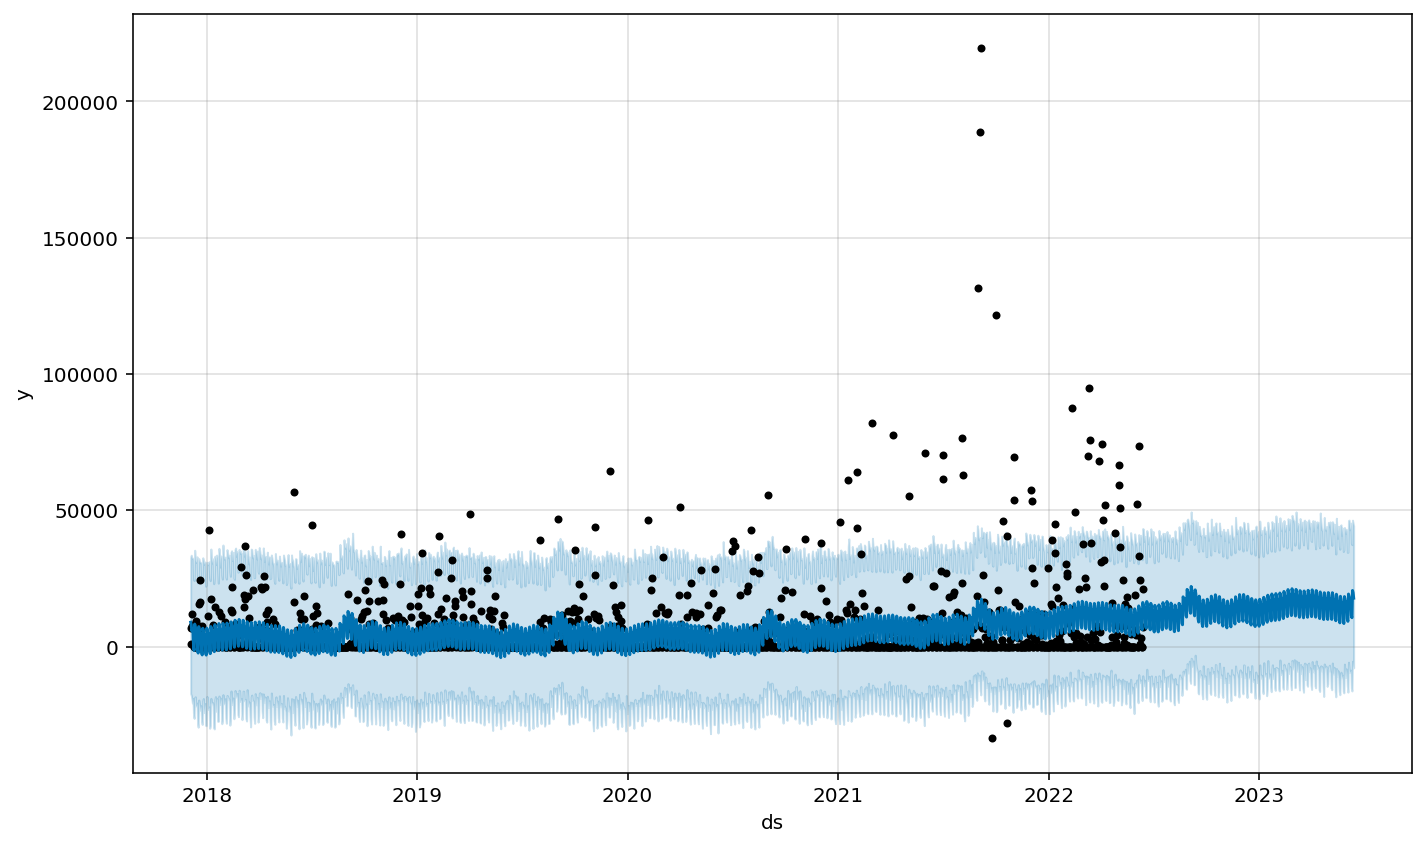

In [45]:
my_model.plot(forecast, uncertainty=True)

* Prophet grafica los valores observados en nuestra serie de tiempo (puntos negros), valores pronosticados (linea azul) y los intervalos de incertidumbre del pronostico (sombreado azul).

* Otra caracteristica particularmente fuerte de Prophet es su capacidad para devoler los componentes de nuestros pronosticos.

* Esto puede ayudar a revelar como los patrones diarios, semanales y anuales de la serie de tiempo contribuyen a los valores pronosticados.

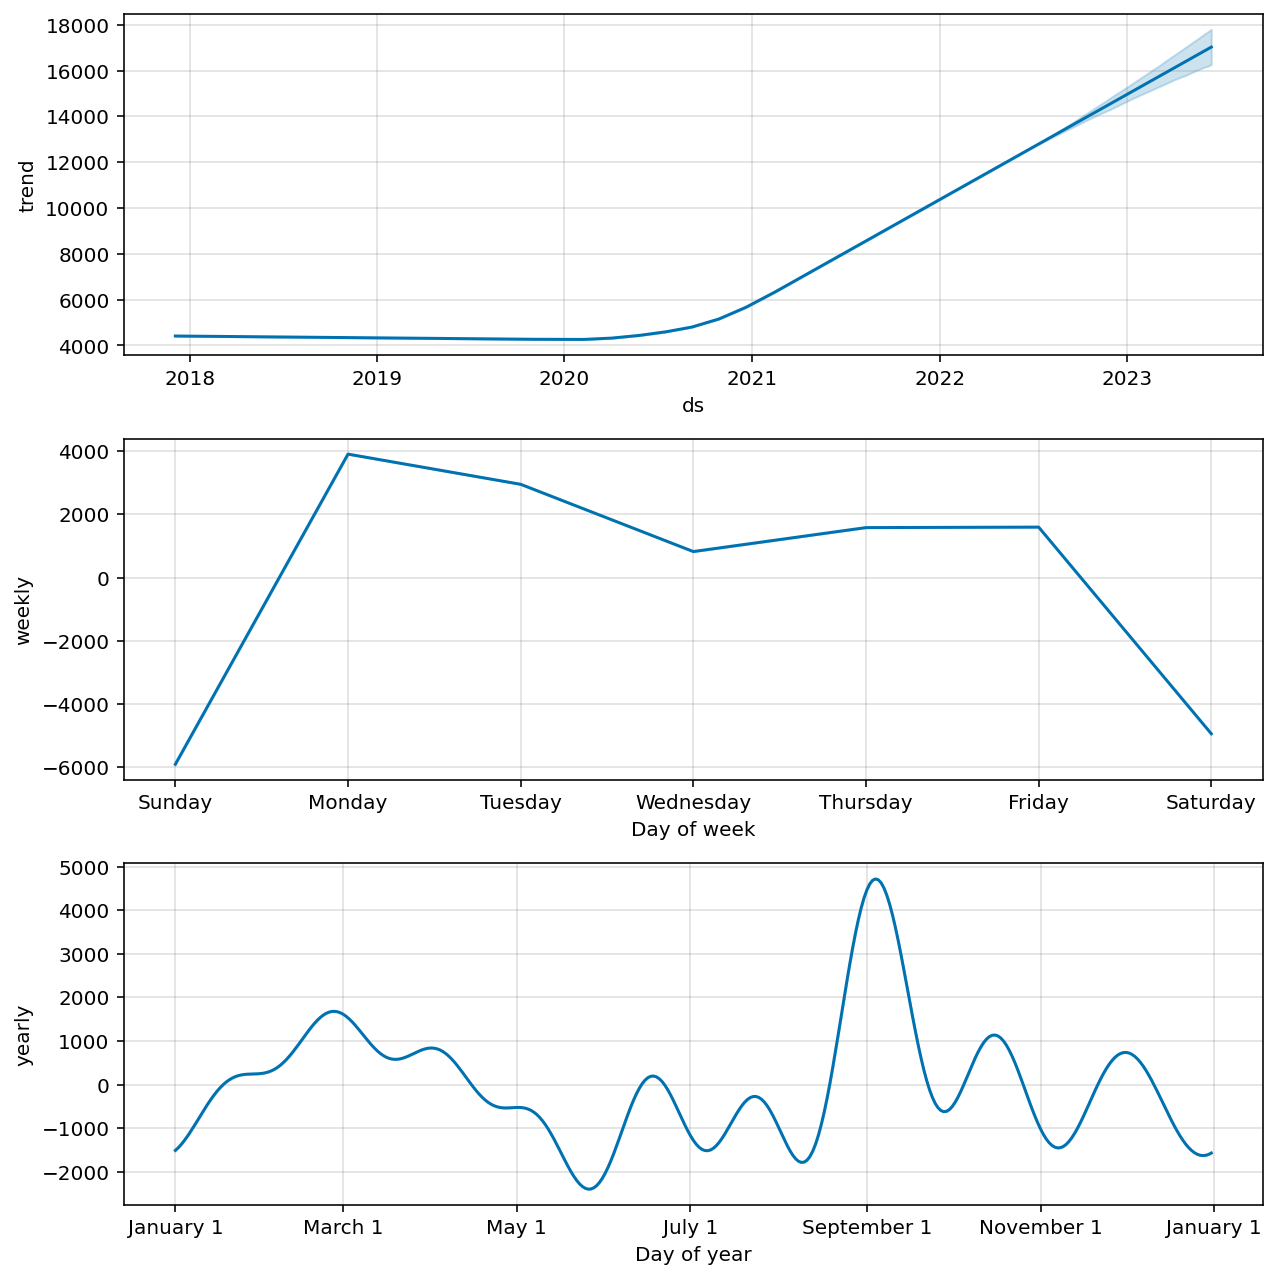

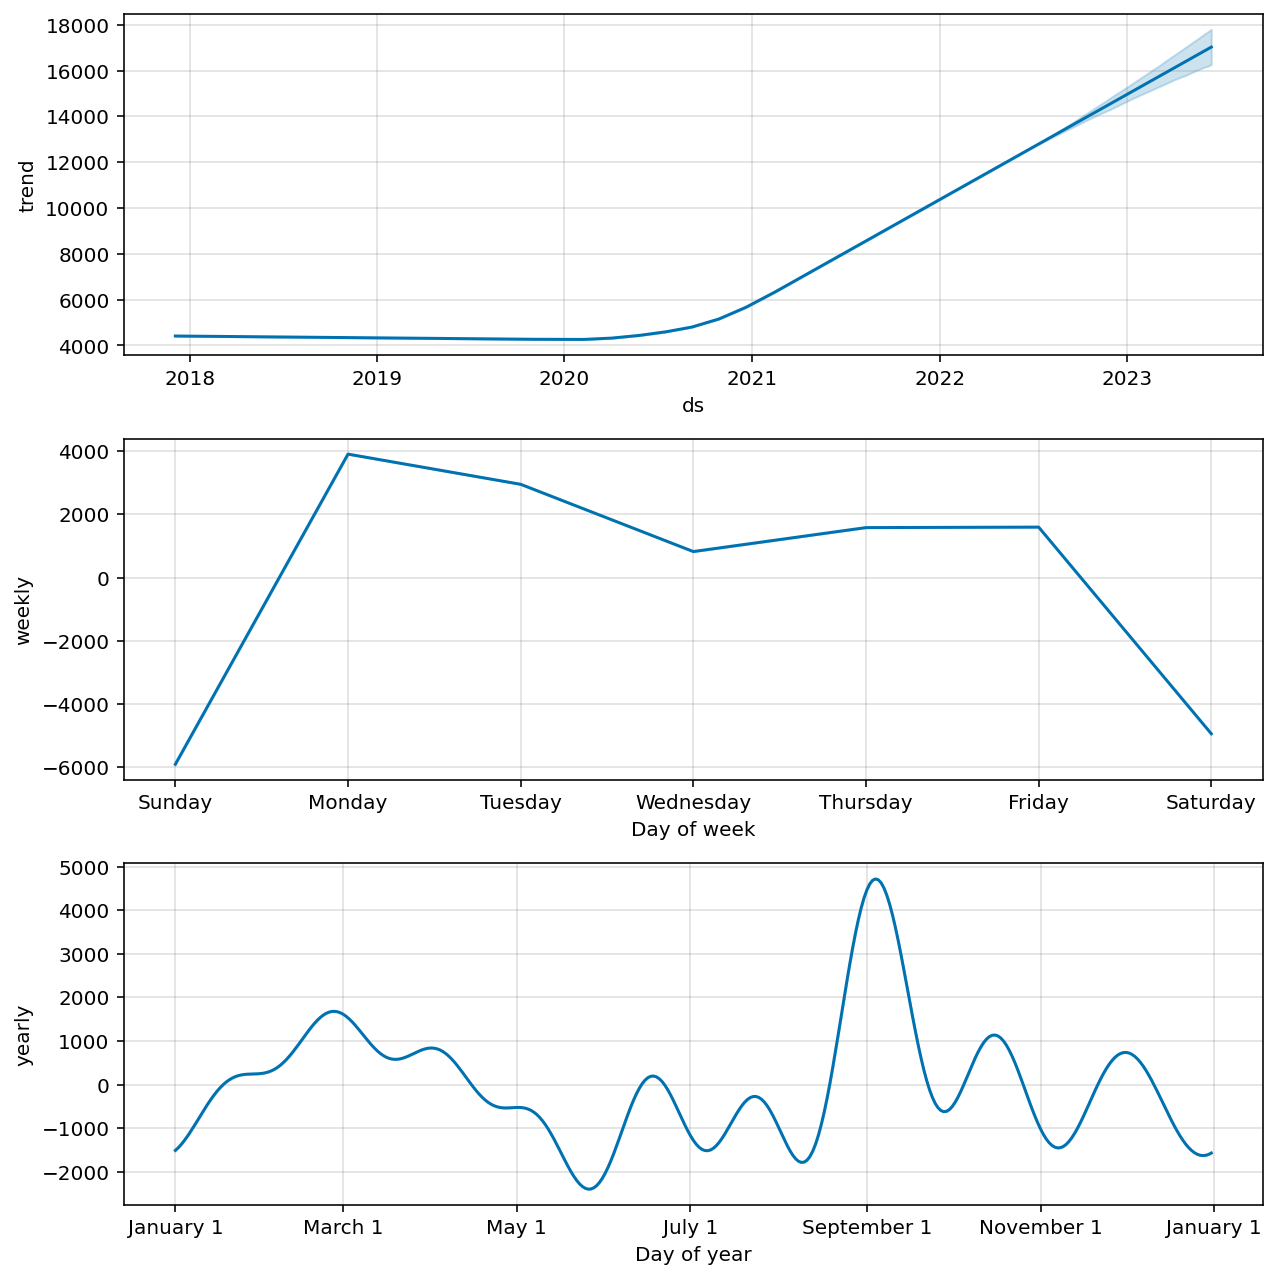

In [46]:
my_model.plot_components(forecast)

* El diagrama anterior proporciona ideas interesantes.

* El primer grafico muestra que el volumen mensual de ingresos disminuye los primeros años y luego aumenta significativamente a partir del 2020

* El segundo grafico destaca el hecho de que el lunes y el viernes son los dias con mas ingresos.

* El tercero muestra que los meses con mas ingresos son los de marzo y sepriembre. Tambien que el mas bajo es junio.





# Graficando los componentes del pronostico

* Podemos graficar los componentes de la tendencia y la estacionalidad del pronostico de la siguiente manera: 

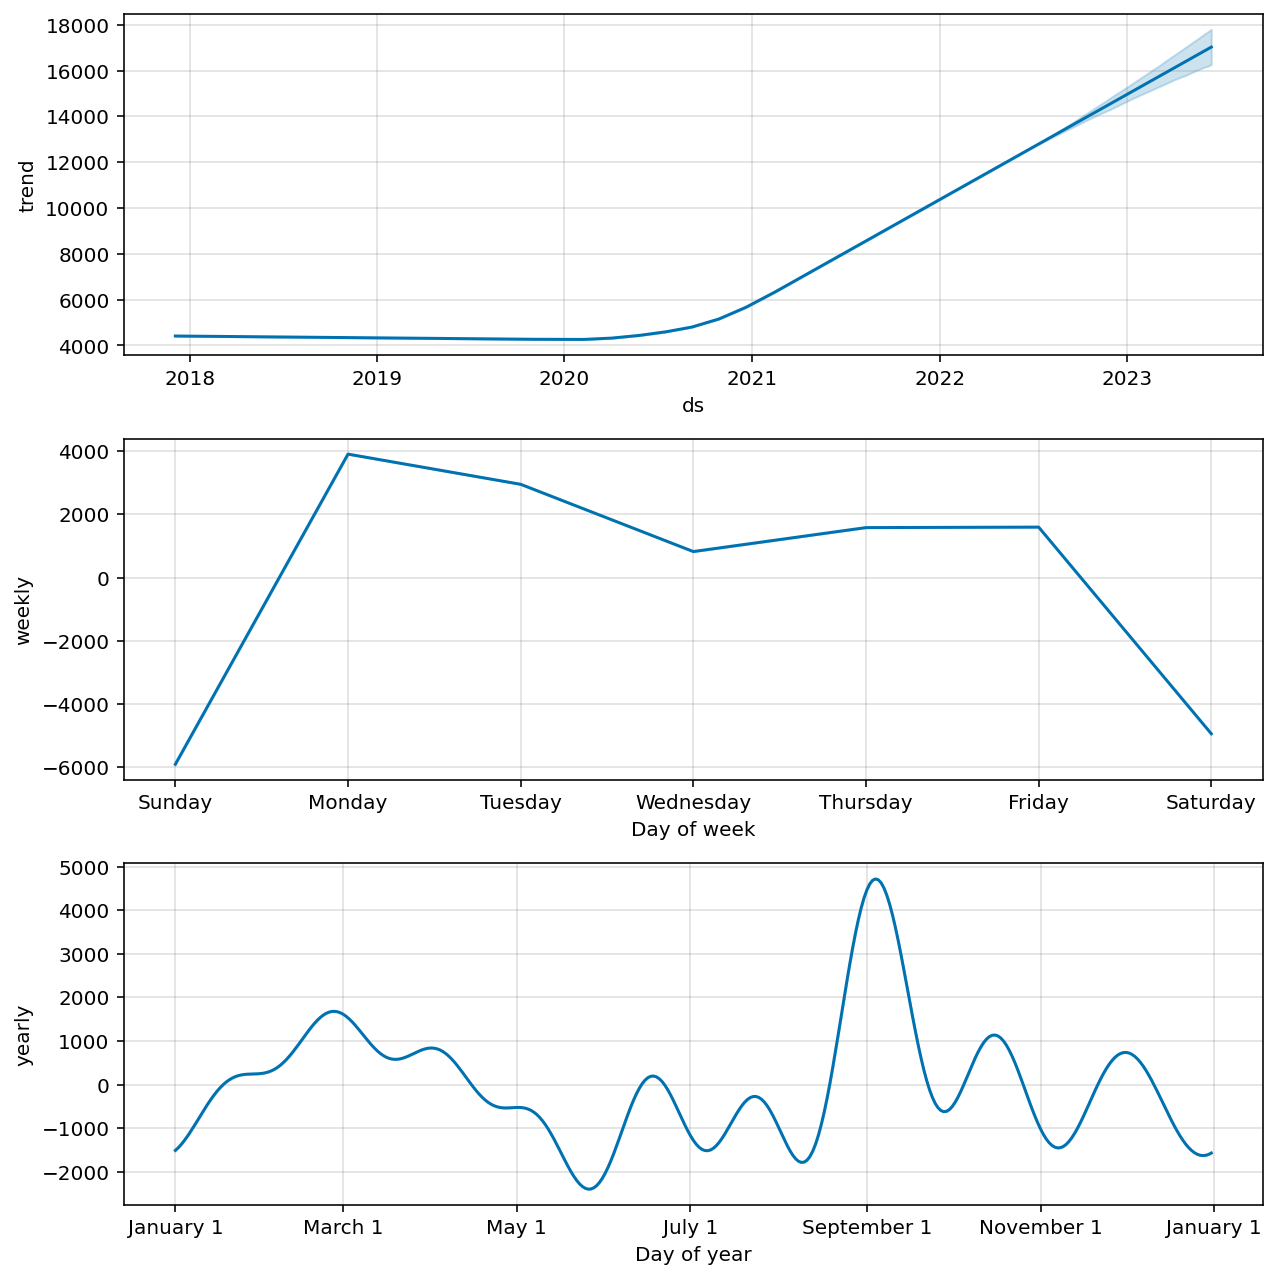

In [47]:
fig1 = my_model.plot_components(forecast)

# Añadiendo puntos de cambio (ChangePoints) a Prophet

* Los puntos de cambio son donde las series de tiempos tienen cambios abruptos en su trayectoria. 

* Por defecto, Prophet añade 25 puntos de cambio al 80% de la serie de tiempo. 

* Graficacaremos cuando estos cambios ocurren

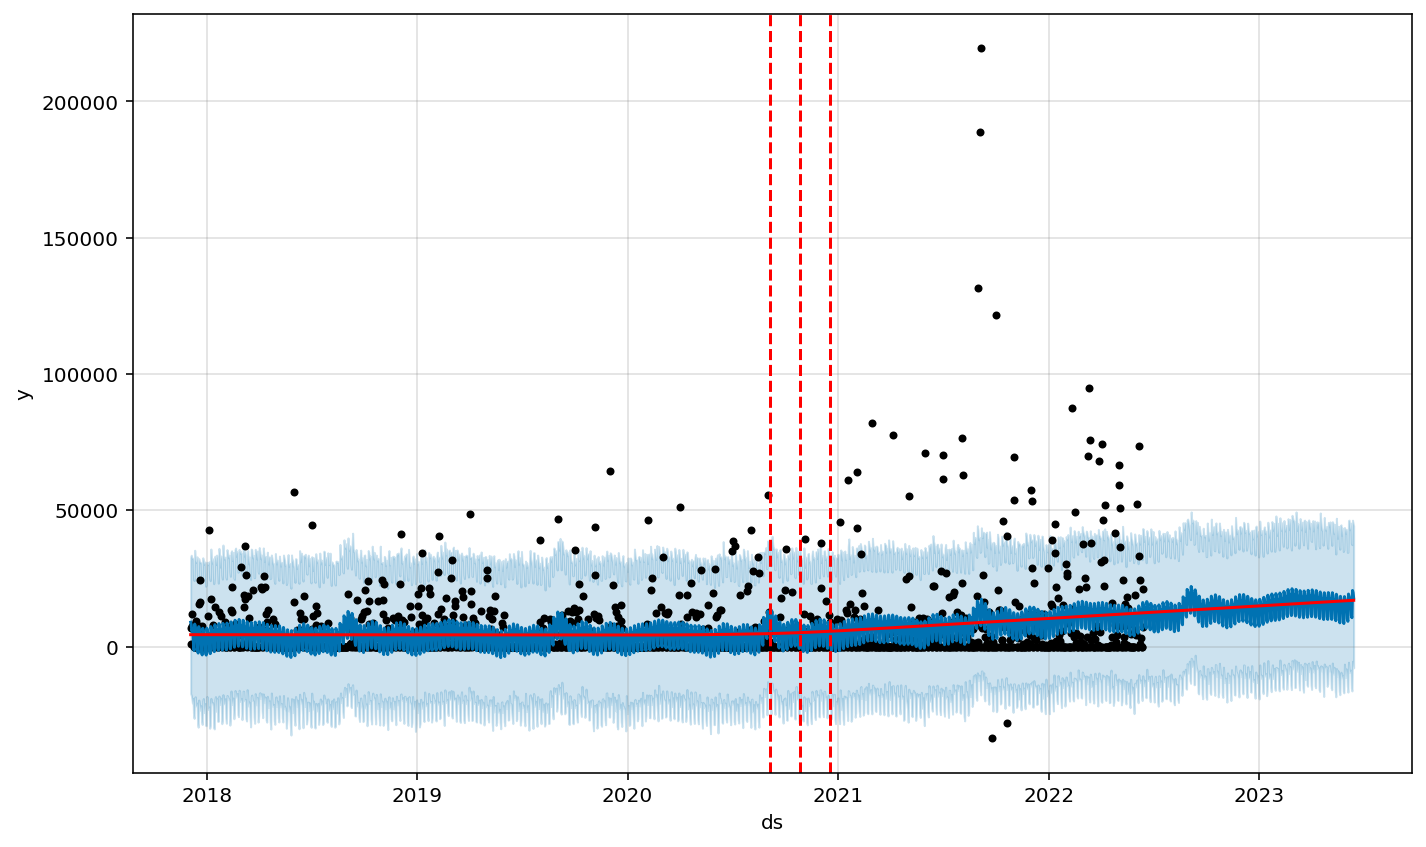

In [48]:
from fbprophet.plot import add_changepoints_to_plot
fig = my_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), my_model, forecast)

Podemos ver las fechas donde courren estos puntos de cambio

In [49]:
my_model.changepoints

53     2018-01-26
106    2018-03-20
159    2018-05-12
212    2018-07-04
264    2018-08-25
317    2018-10-17
370    2018-12-09
423    2019-01-31
476    2019-03-25
529    2019-05-17
582    2019-07-09
635    2019-08-31
687    2019-10-22
740    2019-12-14
793    2020-02-05
846    2020-03-29
899    2020-05-21
952    2020-07-13
1005   2020-09-04
1058   2020-10-27
1110   2020-12-18
1163   2021-02-09
1216   2021-04-03
1269   2021-05-26
1322   2021-07-18
Name: ds, dtype: datetime64[ns]

Podemos cambiar el rango de puntos de cambio configurando el parametro *changepoint_range*

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


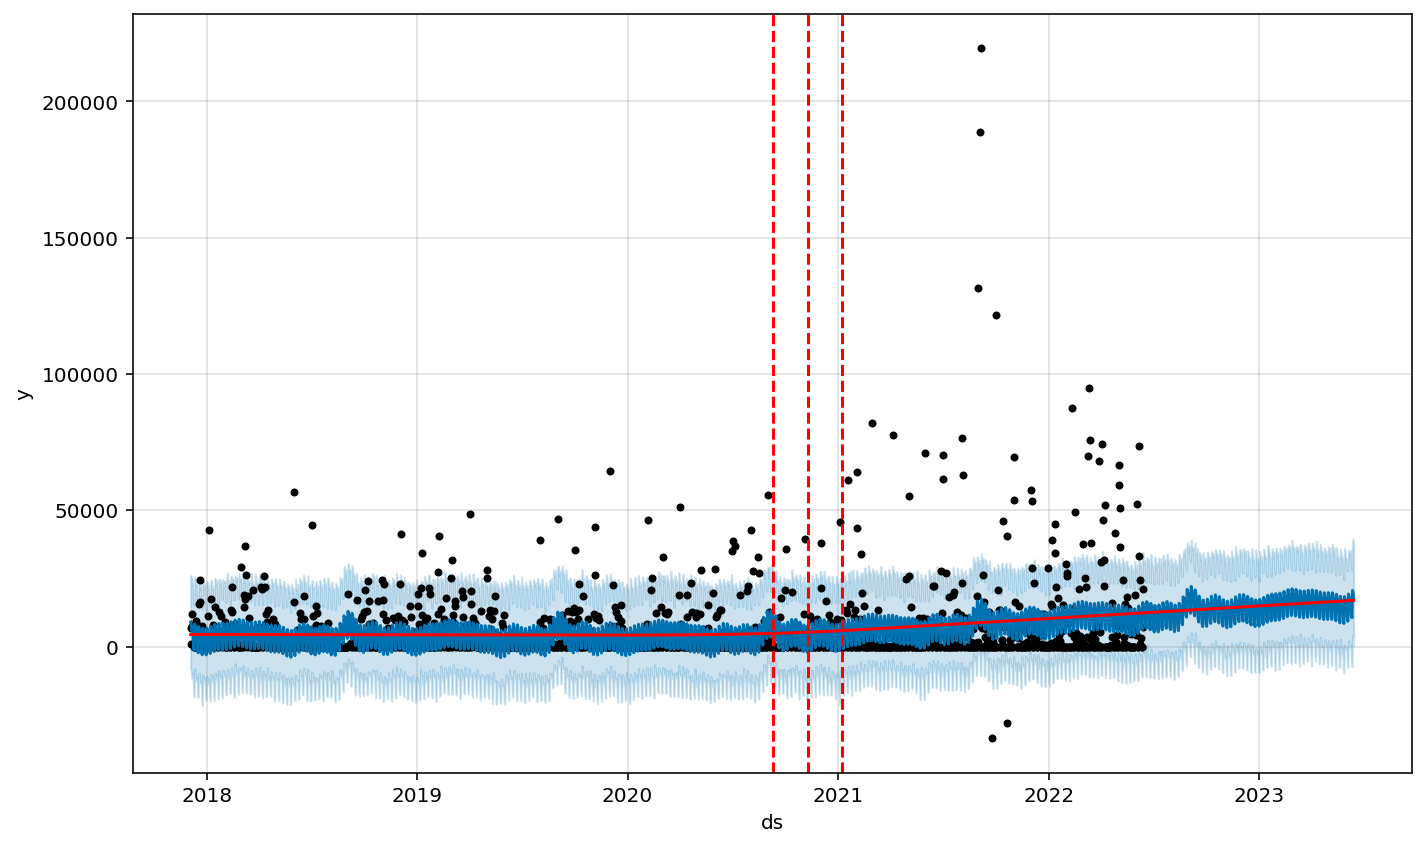

In [51]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(df_ingresos).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

El número de puntos de cambio se puede configurar usando el parametro *n_changepoints* 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


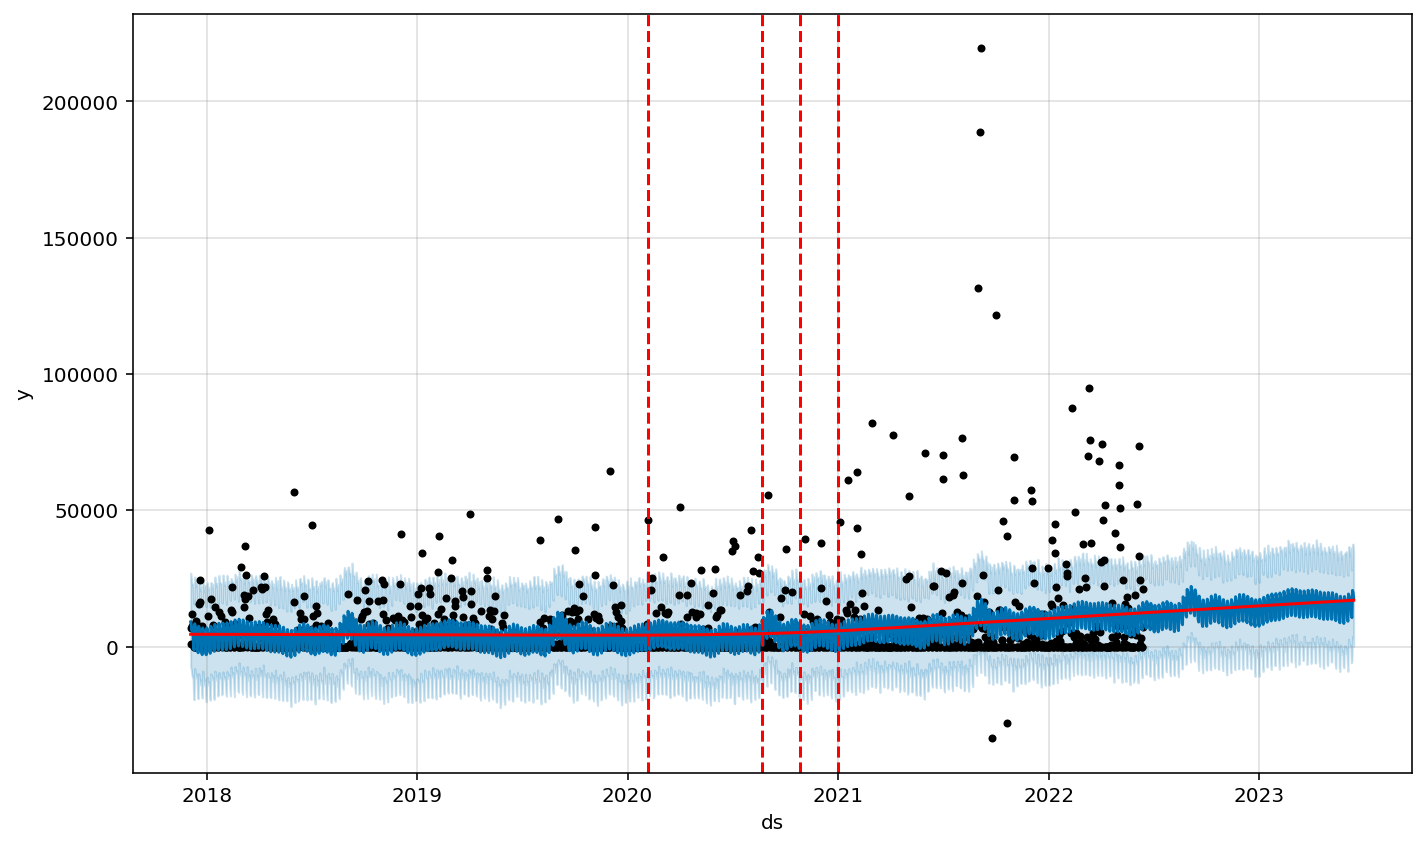

In [52]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast = pro_change.fit(df_ingresos).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

# Ajustando la tendencia

* Prophet nos permite ajustar la tendencia en caso de que haya un overfit o underfit.

* changepoint_prior_scale ayuda a ajustar la fuerza de la tendencia.

* Disminuir el valor de la tendencia para que sea menos flexible.

* Aumentar el changepoint_prior_scale a 0.08 hace que la tendencia sea mas flexible

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


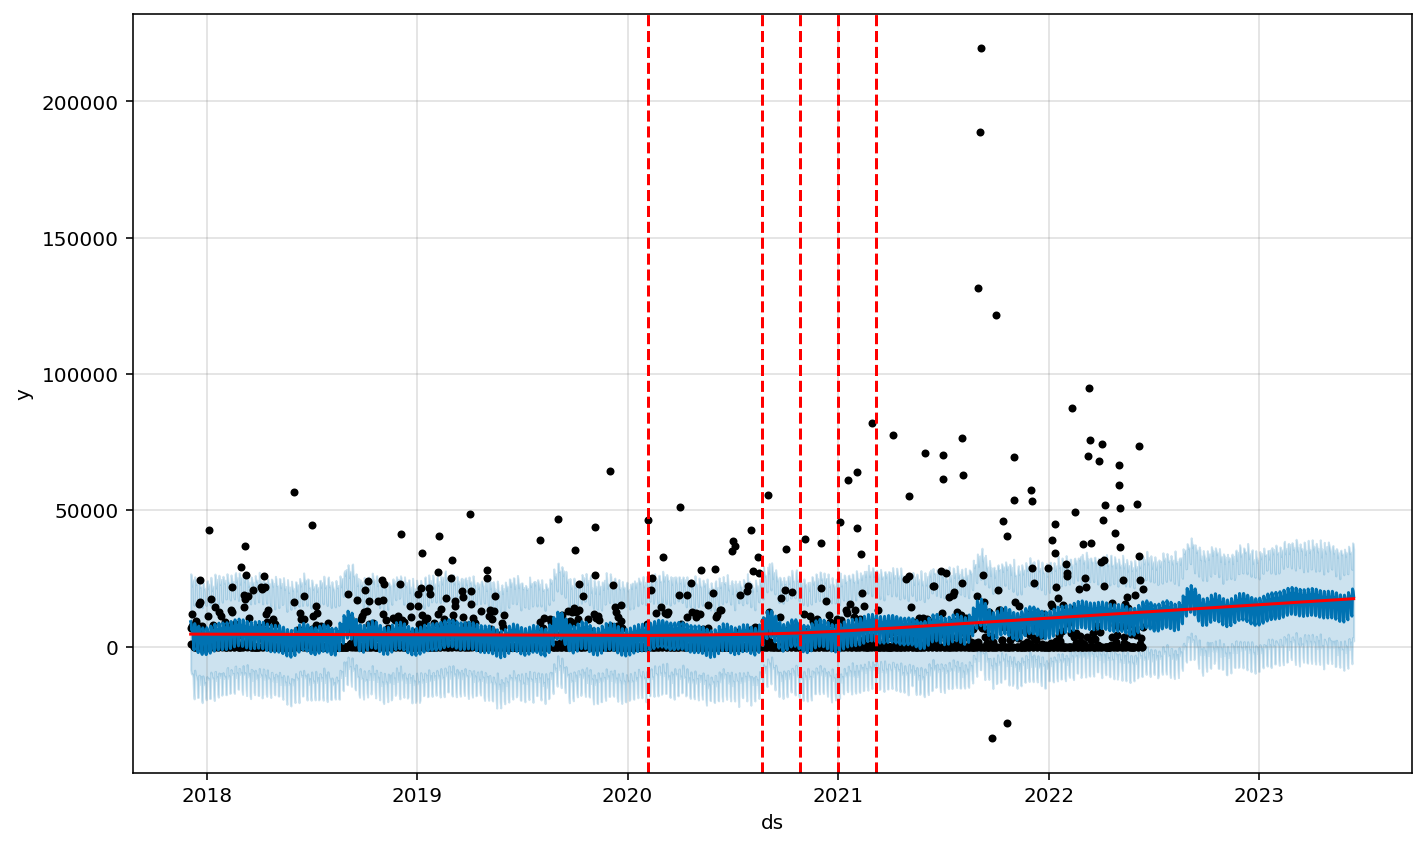

In [53]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast = pro_change.fit(df_ingresos).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

* Decrementar el valor del changepoint_prior_scale a 0.001 hace que la tendencia sea menos flexible.

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


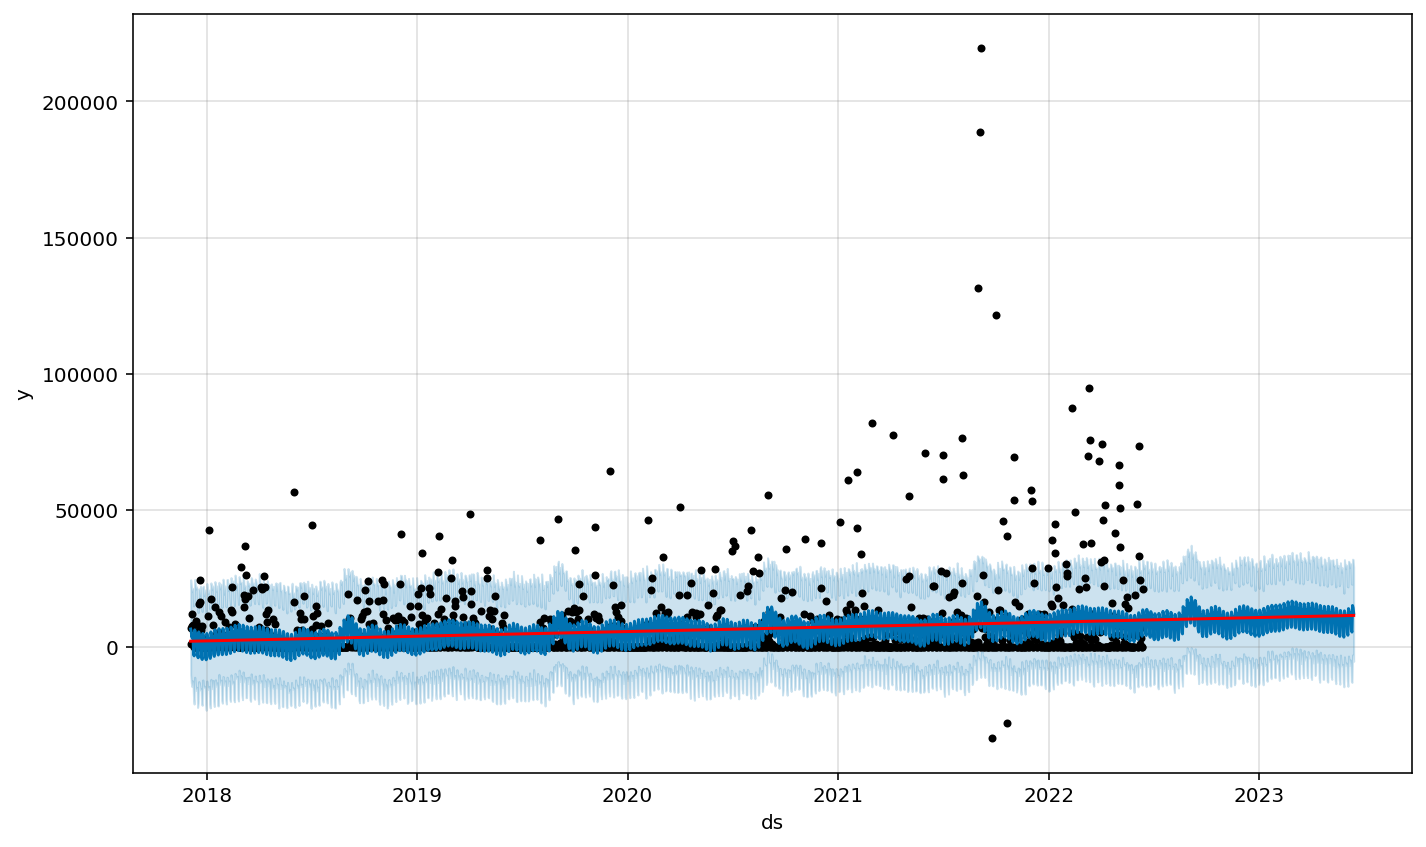

In [54]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.001)
forecast = pro_change.fit(df_ingresos).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)


# Conclucion 

* Se describio cómo usar la libreria de Prophet para realizar pronosticos en series de tiempo en Python

* Prophet proporciona la funcionalidad para traer su propio conocimiento sobre series de tiempo a la mesa.